In [1]:
import klib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


sns.set()

### Loading Expenses Before

In [2]:
all_exps_Before = pd.read_csv("EXPENSES_BEFORE_EXCELD.csv", sep=';')
all_exps_Before.amount = all_exps_Before.amount/-1


all_exps_Before.head(5)

,user_profile_id,amount,expenses_date,subscription_at
0,0fe2a7cf-036b-4f3a-8e10-544c9e1bac51,210.00,21/03/2017 22:48,09/09/2021 15:07
1,0fe2a7cf-036b-4f3a-8e10-544c9e1bac51,95.00,13/04/2017 14:26,09/09/2021 15:07
2,0fe2a7cf-036b-4f3a-8e10-544c9e1bac51,304.00,14/04/2017 21:59,09/09/2021 15:07
3,0fe2a7cf-036b-4f3a-8e10-544c9e1bac51,67.59,14/05/2017 04:47,09/09/2021 15:07
4,0fe2a7cf-036b-4f3a-8e10-544c9e1bac51,117.00,24/05/2017 13:24,09/09/2021 15:07


### Loading Expenses After

In [3]:
all_exps_After = pd.read_csv("EXPENSES_AFTER_EXCELD.csv", sep=';')
all_exps_After.amount = all_exps_After.amount/-1


all_exps_After.head(5)

,user_profile_id,amount,expenses_date,subscription_at
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,57.23,08/03/2021 19:17,08/03/2021 16:07
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,4.45,09/03/2021 08:48,08/03/2021 16:07
2,23f86c16-a139-408e-822c-7bbee9ddf5a4,27.20,09/03/2021 11:36,08/03/2021 16:07
3,715e8d4c-4b98-4f89-8a66-87408672a16f,56.06,09/03/2021 11:57,07/03/2021 09:42
4,6d47684d-120d-4506-9fdc-71f5bfff07ad,10.30,10/03/2021 06:50,08/03/2021 16:07


# Main Functions

In [4]:
cols = ["Users", "Total Exp B", "Total Exp A", "Mean Exp B", "Mean Exp A", "Mean Evolution"]
cols_B = ["Period", "Mean Exp B", "Total Exp B"]
cols_A = ["Period", "Mean Exp A", "Total Exp A"]


colors = ['orange', 'royalblue']

user_exp_DF = pd.DataFrame(columns=cols) 
monthly_exp_A_DF = pd.DataFrame(columns=cols_A) 
monthly_exp_B_DF = pd.DataFrame(columns=cols_B) 

def series_lst(df):
    i = 0
    val_lst = []
    while i < len(df):
        row = df.iloc[i]
        val = row[0]
        val_lst.append(round(val, 3))
        i += 1
    return val_lst

In [5]:
all_exps_After.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22349 entries, 0 to 22348
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_profile_id  22349 non-null  object 
 1   amount           22349 non-null  float64
 2   expenses_date    22349 non-null  object 
 3   subscription_at  22349 non-null  object 
dtypes: float64(1), object(3)
memory usage: 698.5+ KB


## All expenses made before and after subscription

Get the unique **user_profile_id** from the **all_exps_After** dataframe.

This is later going to be used on the **all_exps_Before** dataframe to get all the expenses made before.

This will ensure that the two dataframes **all_exps_Before** and **all_exps_After** contains users that made expenses before and after subscribing to flyingblue   

In [6]:
unique_user_id_exp_after = all_exps_After.user_profile_id.unique()
len(unique_user_id_exp_after)

270

In [7]:
lstT = [] 
for i in unique_user_id_exp_after:
    lst_tmp = list(np.where(all_exps_Before.user_profile_id == i))[0]
    #if len(lst_tmp) > 0:
    lstT.append(lst_tmp)
#lstT

In [8]:
abv = 0
blw = 0
lst = [] 
indexes_present_in_after_AND_before = [] 
for i in unique_user_id_exp_after:
    lst_tmp = list(np.where(all_exps_Before.user_profile_id == i))[0]
    if len(lst_tmp) > 0:
        lst.append(lst_tmp)
        indexes_present_in_after_AND_before.append(i)
        abv += 1
    else:
        blw += 1

In [9]:
len(lst), abv, blw

(249, 249, 21)

In [10]:
print("indexes_present_in_after_AND_before", len(indexes_present_in_after_AND_before))

indexes_present_in_after_AND_before 249


In [11]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [12]:
all_indexes_before = flatten(lst)

all_exps_Before = all_exps_Before.iloc[all_indexes_before]

In [13]:
all_exps_Before

,user_profile_id,amount,expenses_date,subscription_at
18546,6d47684d-120d-4506-9fdc-71f5bfff07ad,6.05,06/02/2021 09:47,08/03/2021 16:07
18562,6d47684d-120d-4506-9fdc-71f5bfff07ad,1.00,06/02/2021 15:43,08/03/2021 16:07
18564,6d47684d-120d-4506-9fdc-71f5bfff07ad,0.01,06/02/2021 15:50,08/03/2021 16:07
18565,6d47684d-120d-4506-9fdc-71f5bfff07ad,0.01,06/02/2021 15:51,08/03/2021 16:07
18570,6d47684d-120d-4506-9fdc-71f5bfff07ad,39.35,06/02/2021 19:51,08/03/2021 16:07
...,...,...,...,...
24290,fa25233d-1a64-4905-b66c-a36aec4c6667,308.50,17/09/2021 21:01,22/09/2021 15:31
24292,fa25233d-1a64-4905-b66c-a36aec4c6667,61.88,21/09/2021 09:54,22/09/2021 15:31
24293,fa25233d-1a64-4905-b66c-a36aec4c6667,5.40,21/09/2021 10:34,22/09/2021 15:31
24294,fa25233d-1a64-4905-b66c-a36aec4c6667,5.40,21/09/2021 12:24,22/09/2021 15:31


In [14]:
unique_user_id_exp_before = all_exps_Before.user_profile_id.unique()
len(unique_user_id_exp_before)

249

In [15]:
af_abv = 0
af_blw = 0
af_lst = [] 
for i in indexes_present_in_after_AND_before:
    af_lst_tmp = list(np.where(all_exps_After.user_profile_id == i))[0]
    if len(af_lst_tmp) > 0:
        af_lst.append(af_lst_tmp)
        af_abv += 1
    else:
        af_blw += 1

In [16]:
len(af_lst), af_abv, af_blw

(249, 249, 0)

In [17]:
all_indexes_after = flatten(af_lst)

all_exps_After = all_exps_After.iloc[all_indexes_after]
all_exps_After

,user_profile_id,amount,expenses_date,subscription_at
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,57.23,08/03/2021 19:17,08/03/2021 16:07
4,6d47684d-120d-4506-9fdc-71f5bfff07ad,10.30,10/03/2021 06:50,08/03/2021 16:07
5,6d47684d-120d-4506-9fdc-71f5bfff07ad,1.90,10/03/2021 07:08,08/03/2021 16:07
7,6d47684d-120d-4506-9fdc-71f5bfff07ad,-0.00,10/03/2021 09:43,08/03/2021 16:07
8,6d47684d-120d-4506-9fdc-71f5bfff07ad,29.00,10/03/2021 12:12,08/03/2021 16:07
...,...,...,...,...
22276,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,2.10,22/09/2021 19:21,21/09/2021 17:06
22279,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,11.10,22/09/2021 19:41,21/09/2021 17:06
22322,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,3.30,23/09/2021 06:45,21/09/2021 17:06
22338,fa25233d-1a64-4905-b66c-a36aec4c6667,29.40,23/09/2021 09:04,22/09/2021 15:31


# Transforming dates

In [18]:
all_exps_After_months = all_exps_After.copy()
all_exps_Before_months = all_exps_Before.copy()

In [19]:
all_exps_After_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21996 entries, 0 to 22341
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_profile_id  21996 non-null  object 
 1   amount           21996 non-null  float64
 2   expenses_date    21996 non-null  object 
 3   subscription_at  21996 non-null  object 
dtypes: float64(1), object(3)
memory usage: 859.2+ KB


In [20]:
all_exps_After_months.expenses_date = all_exps_After_months.expenses_date.str.slice(start=3, stop=10)
all_exps_After_months.subscription_at = all_exps_After_months.subscription_at.str.slice(start=3, stop=10)
all_exps_After_months.head(5)

,user_profile_id,amount,expenses_date,subscription_at
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,57.23,03/2021,03/2021
4,6d47684d-120d-4506-9fdc-71f5bfff07ad,10.30,03/2021,03/2021
5,6d47684d-120d-4506-9fdc-71f5bfff07ad,1.90,03/2021,03/2021
7,6d47684d-120d-4506-9fdc-71f5bfff07ad,-0.00,03/2021,03/2021
8,6d47684d-120d-4506-9fdc-71f5bfff07ad,29.00,03/2021,03/2021


In [21]:
all_exps_Before_months.expenses_date = all_exps_Before_months.expenses_date.str.slice(start=3, stop=10)
all_exps_Before_months.subscription_at = all_exps_Before_months.subscription_at.str.slice(start=3, stop=10)
all_exps_Before_months.head(5)

,user_profile_id,amount,expenses_date,subscription_at
18546,6d47684d-120d-4506-9fdc-71f5bfff07ad,6.05,02/2021,03/2021
18562,6d47684d-120d-4506-9fdc-71f5bfff07ad,1.00,02/2021,03/2021
18564,6d47684d-120d-4506-9fdc-71f5bfff07ad,0.01,02/2021,03/2021
18565,6d47684d-120d-4506-9fdc-71f5bfff07ad,0.01,02/2021,03/2021
18570,6d47684d-120d-4506-9fdc-71f5bfff07ad,39.35,02/2021,03/2021


## Analysis by months

## Months After Subscription

### Sum Expenses

In [22]:
sum_monthly_exp_A = all_exps_After_months.groupby('expenses_date').sum()
sum_monthly_exp_usr_A = all_exps_After_months.groupby('user_profile_id').sum()

monthly_exp_A_DF["Total Exp A"] = series_lst(sum_monthly_exp_A)
user_exp_DF["Total Exp A"] = series_lst(sum_monthly_exp_usr_A)

sum_monthly_exp_A.head(3)
#monthly_exp_A_DF

,amount
expenses_date,
03/2021,122939.39
04/2021,423099.37
05/2021,658985.56


### Mean Expenses

In [23]:
av_monthly_exp_A = all_exps_After_months.groupby('expenses_date').mean()
av_monthly_exp_usr_A = all_exps_After_months.groupby('user_profile_id').mean()

monthly_exp_A_DF["Mean Exp A"] = series_lst(av_monthly_exp_A)
user_exp_DF["Mean Exp A"] = series_lst(av_monthly_exp_usr_A)

av_monthly_exp_A.head(3)
#monthly_exp_A_DF

,amount
expenses_date,
03/2021,193.910710
04/2021,231.075571
05/2021,264.652835


Getting same months

In [24]:
months_to_compare = []

all_months_before = all_exps_Before_months.expenses_date.unique()
all_months_after = all_exps_After_months.expenses_date.unique()

for i in all_months_after:
    if i in all_months_before:
        months_to_compare.append(i)

In [25]:
months_to_compare

['03/2021', '04/2021', '05/2021', '06/2021', '07/2021', '08/2021', '09/2021']

### Adding months

In [26]:
monthly_exp_A_DF["Period"] = all_exps_After_months.expenses_date.unique()
monthly_exp_A_DF

,Period,Mean Exp A,Total Exp A
0,03/2021,193.911,122939.39
1,04/2021,231.076,423099.37
2,05/2021,264.653,658985.56
3,06/2021,201.442,732242.58
4,07/2021,233.854,1072221.82
5,08/2021,202.150,884003.17
6,09/2021,182.332,811011.13


## Months Before Subscription

### Sum Expenses By month

In [27]:
all_exps_Before_months

,user_profile_id,amount,expenses_date,subscription_at
18546,6d47684d-120d-4506-9fdc-71f5bfff07ad,6.05,02/2021,03/2021
18562,6d47684d-120d-4506-9fdc-71f5bfff07ad,1.00,02/2021,03/2021
18564,6d47684d-120d-4506-9fdc-71f5bfff07ad,0.01,02/2021,03/2021
18565,6d47684d-120d-4506-9fdc-71f5bfff07ad,0.01,02/2021,03/2021
18570,6d47684d-120d-4506-9fdc-71f5bfff07ad,39.35,02/2021,03/2021
...,...,...,...,...
24290,fa25233d-1a64-4905-b66c-a36aec4c6667,308.50,09/2021,09/2021
24292,fa25233d-1a64-4905-b66c-a36aec4c6667,61.88,09/2021,09/2021
24293,fa25233d-1a64-4905-b66c-a36aec4c6667,5.40,09/2021,09/2021
24294,fa25233d-1a64-4905-b66c-a36aec4c6667,5.40,09/2021,09/2021


**Get only the expexnses that were made in the same time periods**

In [28]:
all_exps_Before_months = all_exps_Before_months[all_exps_Before_months['expenses_date'].str.contains('2021')]
all_exps_Before_months = all_exps_Before_months[~all_exps_Before_months['expenses_date'].str.contains('02/2021')]
all_exps_Before_months = all_exps_Before_months[~all_exps_Before_months['expenses_date'].str.contains('01/2021')]
all_exps_Before_months

,user_profile_id,amount,expenses_date,subscription_at
19317,6d47684d-120d-4506-9fdc-71f5bfff07ad,159.00,03/2021,03/2021
19319,6d47684d-120d-4506-9fdc-71f5bfff07ad,38.56,03/2021,03/2021
19330,6d47684d-120d-4506-9fdc-71f5bfff07ad,4.70,03/2021,03/2021
19345,6d47684d-120d-4506-9fdc-71f5bfff07ad,16.00,03/2021,03/2021
19362,6d47684d-120d-4506-9fdc-71f5bfff07ad,10.00,03/2021,03/2021
...,...,...,...,...
24290,fa25233d-1a64-4905-b66c-a36aec4c6667,308.50,09/2021,09/2021
24292,fa25233d-1a64-4905-b66c-a36aec4c6667,61.88,09/2021,09/2021
24293,fa25233d-1a64-4905-b66c-a36aec4c6667,5.40,09/2021,09/2021
24294,fa25233d-1a64-4905-b66c-a36aec4c6667,5.40,09/2021,09/2021


### Total Expenses By Month

In [29]:
sum_monthly_exp_B = all_exps_Before_months.groupby('expenses_date').sum()
sum_monthly_exp_usr_B = all_exps_Before_months.groupby('user_profile_id').sum()

monthly_exp_B_DF["Total Exp B"] = series_lst(sum_monthly_exp_B)
user_exp_DF["Total Exp B"] = series_lst(sum_monthly_exp_usr_B)

sum_monthly_exp_B.head(3)
#monthly_exp_B_DF

,amount
expenses_date,
03/2021,166552.57
04/2021,68835.94
05/2021,80744.62


### Mean Expenses By Month

In [30]:
av_monthly_exp_B = all_exps_Before_months.groupby('expenses_date').mean()
av_monthly_exp_usr_B = all_exps_Before_months.groupby('user_profile_id').mean()

monthly_exp_B_DF["Mean Exp B"] = series_lst(av_monthly_exp_B)
user_exp_DF["Mean Exp B"] = series_lst(av_monthly_exp_usr_B)

av_monthly_exp_B.head(3)
#monthly_exp_B_DF

,amount
expenses_date,
03/2021,135.298595
04/2021,108.917627
05/2021,113.405365


## Adding months

In [31]:
monthly_exp_B_DF["Period"] = all_exps_Before_months.expenses_date.unique()
monthly_exp_B_DF.head(7)

,Period,Mean Exp B,Total Exp B
0,03/2021,135.299,166552.57
1,04/2021,108.918,68835.94
2,05/2021,113.405,80744.62
3,06/2021,409.777,462638.02
4,07/2021,183.295,132705.36
5,08/2021,94.660,24232.94
6,09/2021,149.967,10947.58


## Finalising dataframe **user_exp_DF**

In [32]:
user_exp_DF["Users"] = all_exps_After_months.user_profile_id.unique()

In [33]:
user_exp_DF

,Users,Total Exp B,Total Exp A,Mean Exp B,Mean Exp A,Mean Evolution
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,5255.73,190.39,29.862,63.463,NaN
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,41.90,6947.30,41.900,76.344,NaN
2,715e8d4c-4b98-4f89-8a66-87408672a16f,43.00,28186.25,43.000,234.885,NaN
3,ca281221-7339-4475-b769-0d7bdd6cf680,3431.70,820.90,428.962,136.817,NaN
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,35155.02,2929.29,134.179,117.172,NaN
...,...,...,...,...,...,...
244,01df470a-c2d8-4e35-a63a-452ff17da2ec,75.70,103072.54,75.700,444.278,NaN
245,e9a3fb2d-8501-4bd6-8064-d15fd9abb8ce,71.15,1727.86,71.150,75.124,NaN
246,936a10b3-70e0-4a71-a4f4-ea6e4b6975f5,500.00,573.98,500.000,81.997,NaN
247,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,1615.11,8754.68,44.864,59.964,NaN


In [34]:
user_exp_DF["Mean Evolution"] = (user_exp_DF["Mean Exp A"] - user_exp_DF["Mean Exp B"])/ user_exp_DF["Mean Exp B"]

## Final **user_exp_DF** dataframe

In [35]:
user_exp_DF.head(5)

,Users,Total Exp B,Total Exp A,Mean Exp B,Mean Exp A,Mean Evolution
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,5255.73,190.39,29.862,63.463,1.125209
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,41.90,6947.30,41.900,76.344,0.822053
2,715e8d4c-4b98-4f89-8a66-87408672a16f,43.00,28186.25,43.000,234.885,4.462442
3,ca281221-7339-4475-b769-0d7bdd6cf680,3431.70,820.90,428.962,136.817,-0.681051
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,35155.02,2929.29,134.179,117.172,-0.126749


# Monthly Analysis

### After

Text(0, 0.5, 'Amounts /€')

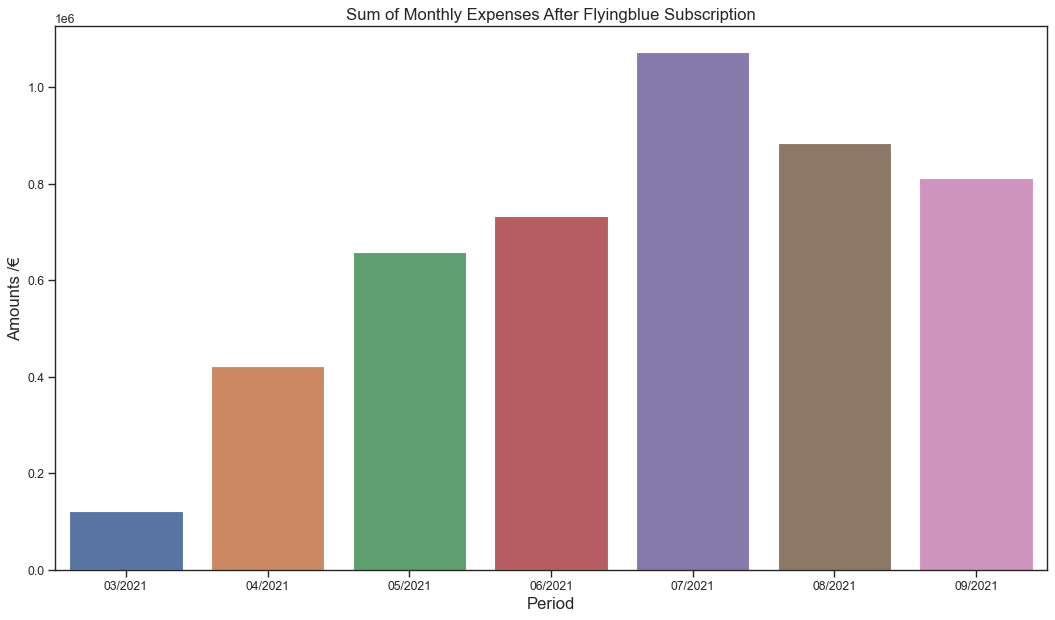

In [36]:
sns.color_palette("hls", 12)
sns.set_style("ticks")
bar,ax = plt.subplots(figsize=(16,9), dpi= 80)
ax = sns.barplot(x=monthly_exp_A_DF.Period, y=monthly_exp_A_DF["Total Exp A"], data=monthly_exp_A_DF, ci=None,  orient='v')
ax.set_title("Sum of Monthly Expenses After Flyingblue Subscription", fontsize=15)

ax.set_xlabel ("Period", size=15)
ax.set_ylabel ("Amounts /€", size=15)

#### Before

In [37]:
monthly_exp_B_DF

,Period,Mean Exp B,Total Exp B
0,03/2021,135.299,166552.57
1,04/2021,108.918,68835.94
2,05/2021,113.405,80744.62
3,06/2021,409.777,462638.02
4,07/2021,183.295,132705.36
5,08/2021,94.660,24232.94
6,09/2021,149.967,10947.58


Text(0, 0.5, 'Amounts /€')

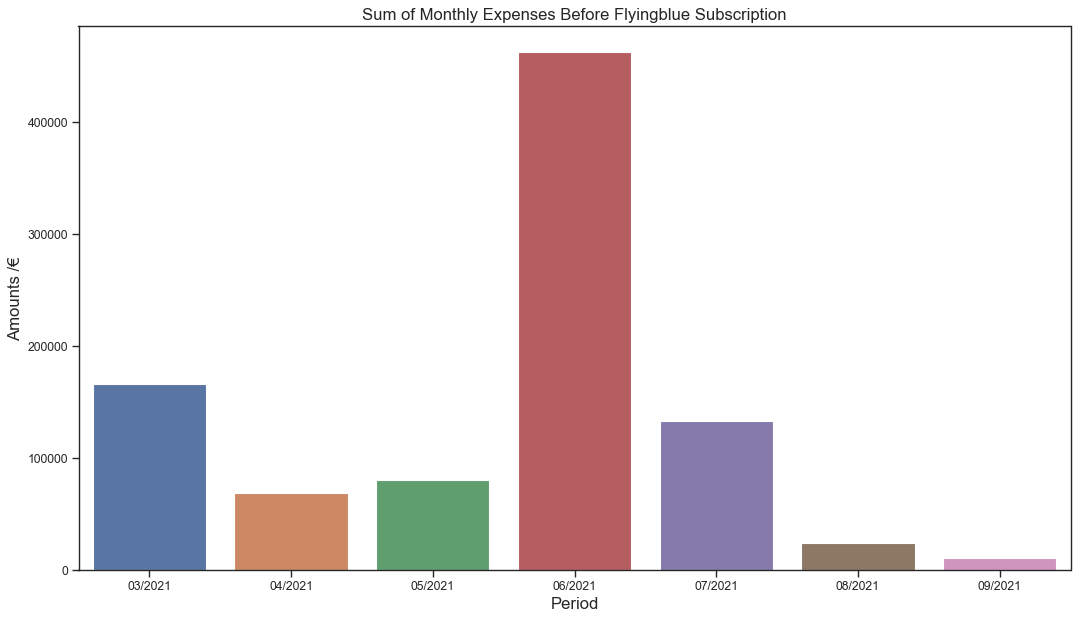

In [38]:
sns.color_palette("hls", 12)
sns.set_style("ticks")
bar,ax = plt.subplots(figsize=(16,9), dpi= 80)
ax = sns.barplot(x=monthly_exp_B_DF.Period, y=monthly_exp_B_DF["Total Exp B"], data=monthly_exp_B_DF, ci=None,  orient='v')
ax.set_title("Sum of Monthly Expenses Before Flyingblue Subscription", fontsize=15)

ax.set_xlabel ("Period", size=15)
ax.set_ylabel ("Amounts /€", size=15)

In [39]:
expenses_before = list(monthly_exp_B_DF["Total Exp B"])
expenses_after = list(monthly_exp_A_DF["Total Exp A"])
period = list(monthly_exp_B_DF.Period)
period

['03/2021', '04/2021', '05/2021', '06/2021', '07/2021', '08/2021', '09/2021']

In [40]:
len(expenses_before), len(expenses_after)

(7, 7)

Text(0, 0.5, 'Amounts /€')

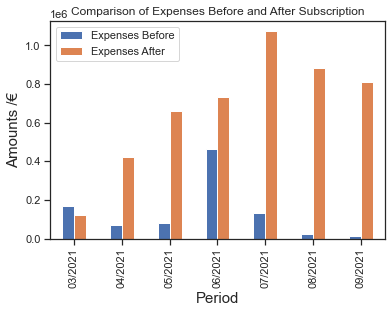

In [41]:
#plt.figure(figsize=(10,8), dpi= 80)

plotdata = pd.DataFrame({
    "Expenses Before":expenses_before,
    "Expenses After":expenses_after,
    
    }, 
    index=period
)
plotdata.plot(kind="bar")
plt.title("Comparison of Expenses Before and After Subscription", size=12)
plt.xlabel("Period", size=15)
plt.ylabel("Amounts /€", size=15)

The number of expenses made by the same users after subscription more than tripples the number they made before subscription for the same time period of 03/2021 - 09/2021

# User Analysis

In [42]:
user_exp_DF.head(5)

,Users,Total Exp B,Total Exp A,Mean Exp B,Mean Exp A,Mean Evolution
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,5255.73,190.39,29.862,63.463,1.125209
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,41.90,6947.30,41.900,76.344,0.822053
2,715e8d4c-4b98-4f89-8a66-87408672a16f,43.00,28186.25,43.000,234.885,4.462442
3,ca281221-7339-4475-b769-0d7bdd6cf680,3431.70,820.90,428.962,136.817,-0.681051
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,35155.02,2929.29,134.179,117.172,-0.126749


## Mean Evolution

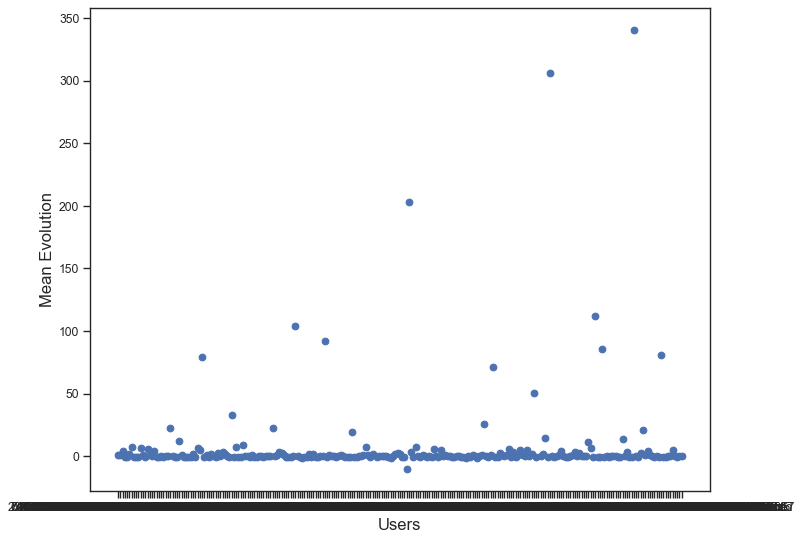

In [43]:
plt.figure(figsize=(10,8), dpi= 80)


plt.scatter(user_exp_DF['Users'], user_exp_DF['Mean Evolution'])
plt.ylabel("Mean Evolution", size=15)
plt.xlabel("Users", size=15)
plt.show() 

**Evolution Less than 1 %**

In [44]:
evolution_less_than_1 = user_exp_DF[user_exp_DF['Mean Evolution'] < 1]
evolution_less_than_1

,Users,Total Exp B,Total Exp A,Mean Exp B,Mean Exp A,Mean Evolution
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,41.90,6947.30,41.900,76.344,0.822053
3,ca281221-7339-4475-b769-0d7bdd6cf680,3431.70,820.90,428.962,136.817,-0.681051
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,35155.02,2929.29,134.179,117.172,-0.126749
7,4569d089-63a2-4088-8271-9157e61fd65a,49.00,967.64,49.000,27.647,-0.435776
8,1d8ca46b-9e97-46ba-8497-37f2a81aad65,697.25,1950.17,38.736,30.003,-0.225449
...,...,...,...,...,...,...
243,3cd6f6af-0ad2-417d-956e-d49d3716735b,1052.99,8238.59,39.000,40.988,0.050974
245,e9a3fb2d-8501-4bd6-8064-d15fd9abb8ce,71.15,1727.86,71.150,75.124,0.055854
246,936a10b3-70e0-4a71-a4f4-ea6e4b6975f5,500.00,573.98,500.000,81.997,-0.836006
247,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,1615.11,8754.68,44.864,59.964,0.336573


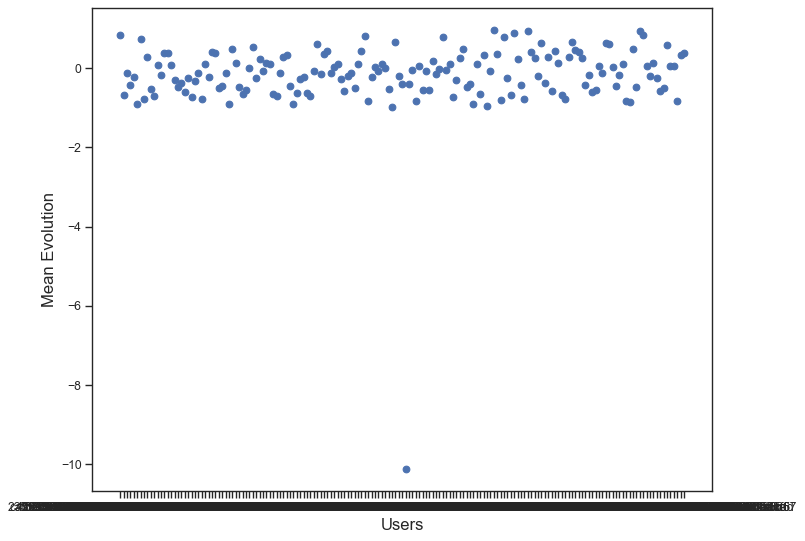

In [45]:
plt.figure(figsize=(10,8), dpi= 80)

plt.scatter(evolution_less_than_1['Users'], evolution_less_than_1['Mean Evolution'])
plt.ylabel("Mean Evolution", size=15)
plt.xlabel("Users", size=15)
plt.show() 

**Evolution Greater than 1 %**

In [46]:
evolution_greater_than_1 = user_exp_DF[user_exp_DF['Mean Evolution'] > 1]
evolution_greater_than_1

,Users,Total Exp B,Total Exp A,Mean Exp B,Mean Exp A,Mean Evolution
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,5255.73,190.39,29.862,63.463,1.125209
2,715e8d4c-4b98-4f89-8a66-87408672a16f,43.00,28186.25,43.000,234.885,4.462442
5,0dc932c3-c64e-4360-ad3d-5ddc8db02f3a,68.59,211.25,68.590,211.250,2.079895
6,88477bb0-180a-488c-b971-a3d18f72398f,35.00,4170.00,35.000,297.857,7.510200
10,22e0c42a-cffa-4931-b714-7c9f653f6d5b,58.65,9027.55,8.379,64.482,6.695668
...,...,...,...,...,...,...
230,3b31b894-21ec-4628-8aa6-59488759f074,72.42,2456.46,72.420,245.646,2.391964
231,90ee9c93-27b7-42a8-aeb1-b73a0eb6aaad,7.70,4064.06,7.700,169.336,20.991688
233,4165e0b2-848e-4779-b9ce-35245474d059,101.80,5047.18,101.800,504.718,3.957937
239,a9a27817-a988-4d7d-a6fe-f7981f7bb88e,14.99,42844.35,7.495,612.062,80.662708


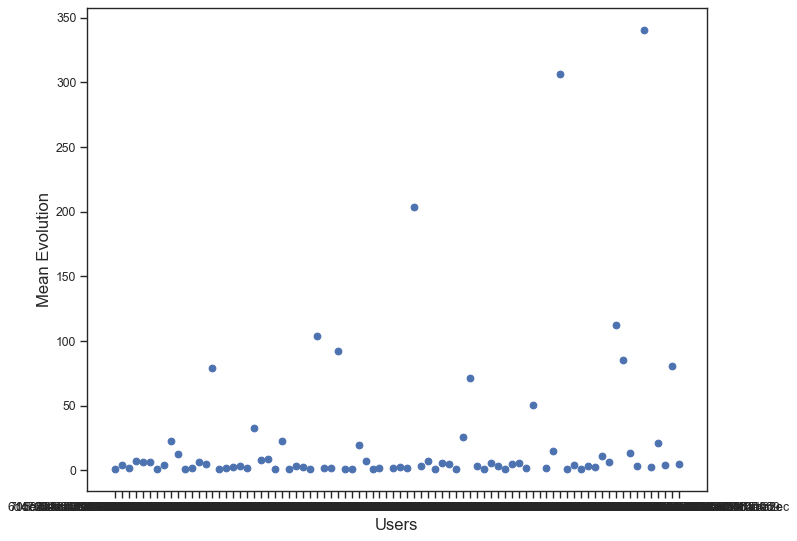

In [47]:
plt.figure(figsize=(10,8), dpi= 80)

plt.scatter(evolution_greater_than_1['Users'], evolution_greater_than_1['Mean Evolution'])
plt.ylabel("Mean Evolution", size=15)
plt.xlabel("Users", size=15)
plt.show() 

## Total Evolution

In [48]:
user_exp_DF["Total Evolution"] = (user_exp_DF["Total Exp A"] - user_exp_DF["Total Exp B"])/ user_exp_DF["Total Exp B"]
user_exp_DF

,Users,Total Exp B,Total Exp A,Mean Exp B,Mean Exp A,Mean Evolution,Total Evolution
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,5255.73,190.39,29.862,63.463,1.125209,-0.963775
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,41.90,6947.30,41.900,76.344,0.822053,164.806683
2,715e8d4c-4b98-4f89-8a66-87408672a16f,43.00,28186.25,43.000,234.885,4.462442,654.494186
3,ca281221-7339-4475-b769-0d7bdd6cf680,3431.70,820.90,428.962,136.817,-0.681051,-0.760789
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,35155.02,2929.29,134.179,117.172,-0.126749,-0.916675
...,...,...,...,...,...,...,...
244,01df470a-c2d8-4e35-a63a-452ff17da2ec,75.70,103072.54,75.700,444.278,4.868930,1360.592338
245,e9a3fb2d-8501-4bd6-8064-d15fd9abb8ce,71.15,1727.86,71.150,75.124,0.055854,23.284751
246,936a10b3-70e0-4a71-a4f4-ea6e4b6975f5,500.00,573.98,500.000,81.997,-0.836006,0.147960
247,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,1615.11,8754.68,44.864,59.964,0.336573,4.420485


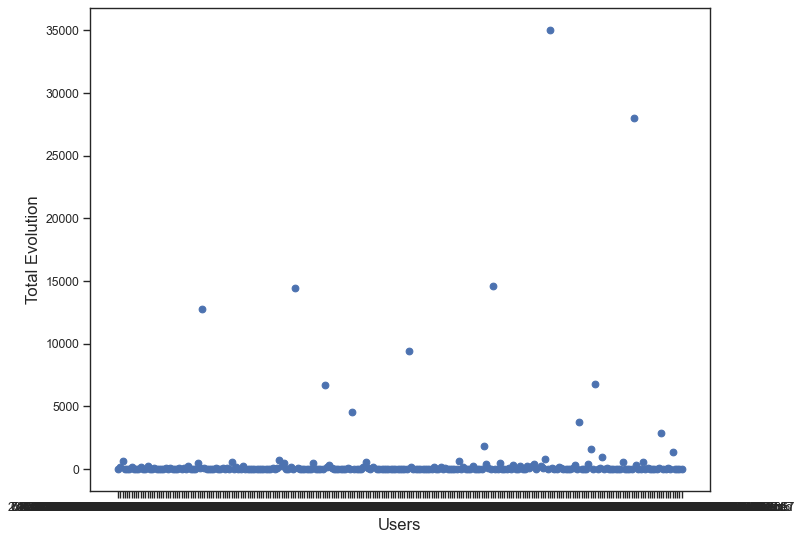

In [49]:
plt.figure(figsize=(10,8), dpi= 80)


plt.scatter(user_exp_DF['Users'], user_exp_DF['Total Evolution'])
plt.ylabel("Total Evolution", size=15)
plt.xlabel("Users", size=15)
plt.show()

# Clutering Users

### Mean Evolution Clustering

In [50]:
x = user_exp_DF.iloc[:, 5:6]

In [51]:
x_val = user_exp_DF[["Users", "Total Evolution"]]

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mean Evolution  249 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [53]:
# Removing Null and Infinity values

x = x[~x.isin([np.nan, np.inf, -np.inf]).any(1)]
x_val = x_val[~x_val.isin([np.nan, np.inf, -np.inf]).any(1)]

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 248
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mean Evolution  247 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
klib.cat_plot(df)

In [55]:
# Scalling dataset

x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.86954260e-01],
       [-1.95628780e-01],
       [-9.14627702e-02],
       [-2.38638547e-01],
       [-2.22777751e-01],
       [-1.59636906e-01],
       [-4.25429478e-03],
       [-2.31620240e-01],
       [-2.25601968e-01],
       [-2.44936515e-01],
       [-2.75613005e-02],
       [-1.98184827e-01],
       [-2.41653223e-01],
       [-4.26206279e-02],
       [-1.83699067e-01],
       [-2.11133767e-01],
       [-1.00975253e-01],
       [-2.34522392e-01],
       [-2.39499909e-01],
       [-2.17148096e-01],
       [-2.24045103e-01],
       [-2.08541344e-01],
       [-2.08062889e-01],
       [ 4.25742857e-01],
       [-2.16614474e-01],
       [-2.27997738e-01],
       [-2.33095386e-01],
       [ 1.39328902e-01],
       [-1.78841033e-01],
       [-2.29983456e-01],
       [-2.36242851e-01],
       [-2.26282647e-01],
       [-2.40080677e-01],
       [-1.68741809e-01],
       [-2.28391943e-01],
       [-2.44944334e-02],
       [-6.71244965e-02],
       [ 2.05520222e+00],
       [-2.2

In [57]:
scalerX = StandardScaler().fit(x)
x_scld = scalerX.transform(x)
#print(x_scaled, x_scld)

In [58]:
x_val["Total Evolution"] = x_scld
x_val

,Users,Total Evolution
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,-0.186954
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,-0.195629
2,715e8d4c-4b98-4f89-8a66-87408672a16f,-0.091463
3,ca281221-7339-4475-b769-0d7bdd6cf680,-0.238639
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,-0.222778
...,...,...
244,01df470a-c2d8-4e35-a63a-452ff17da2ec,-0.079832
245,e9a3fb2d-8501-4bd6-8064-d15fd9abb8ce,-0.217553
246,936a10b3-70e0-4a71-a4f4-ea6e4b6975f5,-0.243072
247,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,-0.209520


In [59]:
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    
    # Fit the data
    kmeans.fit(x_scld)
    
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

In [60]:
wcss

[246.99999999999994,
 57.946055043845725,
 14.399005609699387,
 6.529020022942328,
 3.3013213860376536,
 2.389260045587174]

Text(0, 0.5, 'Within-cluster Sum of Squares')

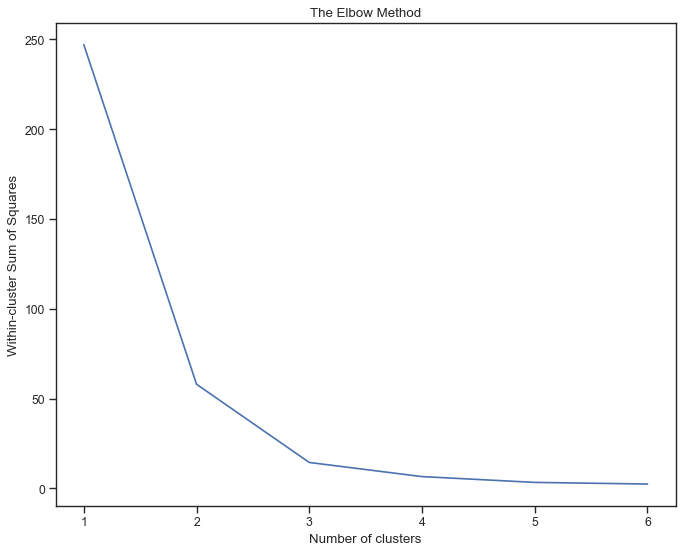

In [61]:
plt.figure(figsize=(10,8), dpi= 80)


number_clusters = range(1,7)

# Plot the number of clusters vs WCSS

plt.plot(number_clusters,wcss)


# Name of the graph - Nom du graphique
plt.title('The Elbow Method')

plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [62]:
kmeans = KMeans(2)
kmeans.fit(x_scld)

KMeans(n_clusters=2)

In [63]:
clusters_identified = kmeans.fit_predict(x_scld)
clusters_identified

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int32)

In [64]:
x_val["Clusters"] = clusters_identified

In [65]:
x_val

,Users,Total Evolution,Clusters
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,-0.186954,0
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,-0.195629,0
2,715e8d4c-4b98-4f89-8a66-87408672a16f,-0.091463,0
3,ca281221-7339-4475-b769-0d7bdd6cf680,-0.238639,0
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,-0.222778,0
...,...,...,...
244,01df470a-c2d8-4e35-a63a-452ff17da2ec,-0.079832,0
245,e9a3fb2d-8501-4bd6-8064-d15fd9abb8ce,-0.217553,0
246,936a10b3-70e0-4a71-a4f4-ea6e4b6975f5,-0.243072,0
247,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,-0.209520,0


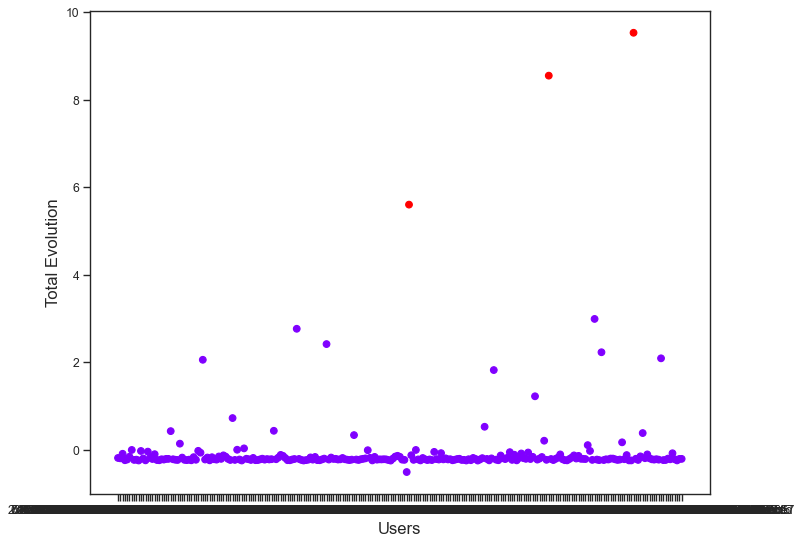

In [66]:
plt.figure(figsize=(10,8), dpi= 80)



plt.scatter(x_val["Users"], x_val["Total Evolution"],
           c=x_val["Clusters"], cmap="rainbow")
plt.xlabel("Users", size=15)
plt.ylabel("Total Evolution", size=15)
plt.show()

In [67]:
scalerX.inverse_transform(x)

array([[ 4.69826462e+01],
       [ 3.63879354e+01],
       [ 1.63612110e+02],
       [-1.61424629e+01],
       [ 3.22927426e+00],
       [ 8.03469631e+01],
       [ 2.70125033e+02],
       [-7.57058533e+00],
       [-2.20110078e-01],
       [-2.38345478e+01],
       [ 2.41658794e+02],
       [ 3.32660827e+01],
       [-1.98244667e+01],
       [ 2.23265938e+02],
       [ 5.09584070e+01],
       [ 1.74507684e+01],
       [ 1.51993946e+02],
       [-1.11151575e+01],
       [-1.71944961e+01],
       [ 1.01051086e+01],
       [ 1.68138176e+00],
       [ 2.06170495e+01],
       [ 2.12014148e+01],
       [ 7.95306257e+02],
       [ 1.07568537e+01],
       [-3.14620676e+00],
       [-9.37226946e+00],
       [ 4.45491774e+02],
       [ 5.68918148e+01],
       [-5.57148366e+00],
       [-1.32164570e+01],
       [-1.05146451e+00],
       [-1.79038233e+01],
       [ 6.92266004e+01],
       [-3.62767376e+00],
       [ 2.45404542e+02],
       [ 1.93337898e+02],
       [ 2.78546238e+03],
       [ 3.5

In [68]:
user_exp_DF = user_exp_DF[~user_exp_DF.isin([np.nan, np.inf, -np.inf]).any(1)]

In [69]:
user_exp_DF[["Users", "Total Evolution"]]

,Users,Total Evolution
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,-0.963775
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,164.806683
2,715e8d4c-4b98-4f89-8a66-87408672a16f,654.494186
3,ca281221-7339-4475-b769-0d7bdd6cf680,-0.760789
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,-0.916675
...,...,...
244,01df470a-c2d8-4e35-a63a-452ff17da2ec,1360.592338
245,e9a3fb2d-8501-4bd6-8064-d15fd9abb8ce,23.284751
246,936a10b3-70e0-4a71-a4f4-ea6e4b6975f5,0.147960
247,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,4.420485


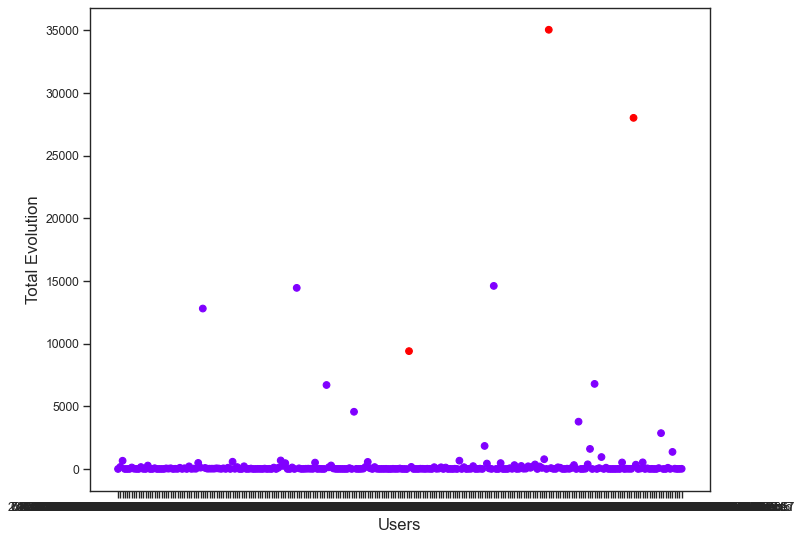

In [70]:
plt.figure(figsize=(10,8), dpi= 80)



plt.scatter(user_exp_DF["Users"], user_exp_DF["Total Evolution"],
           c=x_val["Clusters"], cmap="rainbow")
plt.xlabel("Users", size=15)
plt.ylabel("Total Evolution", size=15)
plt.show()

In [71]:
user_exp_DF.iloc[:, 5:6]

,Mean Evolution
0,1.125209
1,0.822053
2,4.462442
3,-0.681051
4,-0.126749
...,...
244,4.868930
245,0.055854
246,-0.836006
247,0.336573


In [72]:
kmeans = KMeans(2)
kmeans.fit(user_exp_DF.iloc[:, 5:6])

clusters_identified = kmeans.fit_predict(user_exp_DF.iloc[:, 5:6])
clusters_identified

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int32)

In [73]:
user_exp_DF["Clusters"] = clusters_identified

<ipython-input-73-b589272b686f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_exp_DF["Clusters"] = clusters_identified


In [74]:
user_exp_DF

,Users,Total Exp B,Total Exp A,Mean Exp B,Mean Exp A,Mean Evolution,Total Evolution,Clusters
0,6d47684d-120d-4506-9fdc-71f5bfff07ad,5255.73,190.39,29.862,63.463,1.125209,-0.963775,0
1,23f86c16-a139-408e-822c-7bbee9ddf5a4,41.90,6947.30,41.900,76.344,0.822053,164.806683,0
2,715e8d4c-4b98-4f89-8a66-87408672a16f,43.00,28186.25,43.000,234.885,4.462442,654.494186,0
3,ca281221-7339-4475-b769-0d7bdd6cf680,3431.70,820.90,428.962,136.817,-0.681051,-0.760789,0
4,6f3ab3dd-a3cc-4bf8-b52c-5f1e682885f6,35155.02,2929.29,134.179,117.172,-0.126749,-0.916675,0
...,...,...,...,...,...,...,...,...
244,01df470a-c2d8-4e35-a63a-452ff17da2ec,75.70,103072.54,75.700,444.278,4.868930,1360.592338,0
245,e9a3fb2d-8501-4bd6-8064-d15fd9abb8ce,71.15,1727.86,71.150,75.124,0.055854,23.284751,0
246,936a10b3-70e0-4a71-a4f4-ea6e4b6975f5,500.00,573.98,500.000,81.997,-0.836006,0.147960,0
247,19fbae28-71b2-4c6b-b55b-3b1b291b8cdd,1615.11,8754.68,44.864,59.964,0.336573,4.420485,0


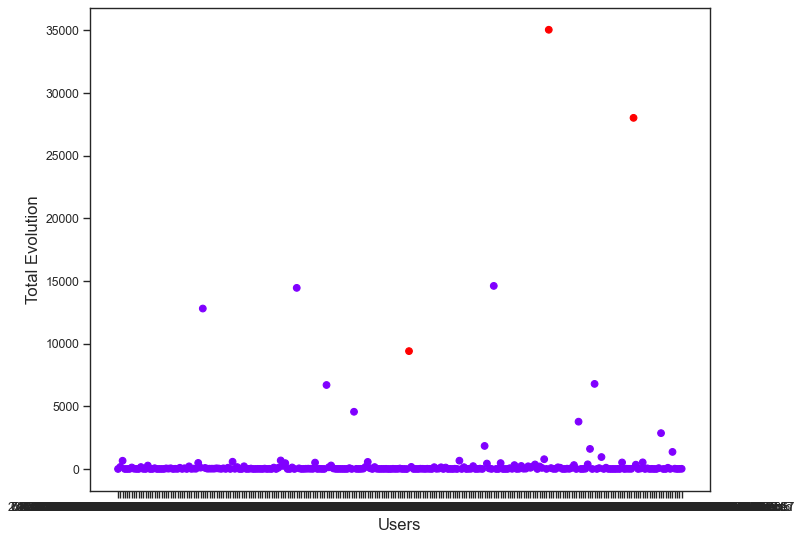

In [75]:
plt.figure(figsize=(10,8), dpi= 80)



plt.scatter(user_exp_DF["Users"], user_exp_DF["Total Evolution"],
           c=user_exp_DF["Clusters"], cmap="rainbow")
plt.xlabel("Users", size=15)
plt.ylabel("Total Evolution", size=15)
plt.show()